<a href="https://colab.research.google.com/github/zakzakzak/Image-and-Video-processing/blob/master/coba_visualisasi_weight_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import tensorflow as tf
# ambil dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
# pelabelan
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# informasi dimensi dataset
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)



X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28)
y_test.shape  = (10000,)


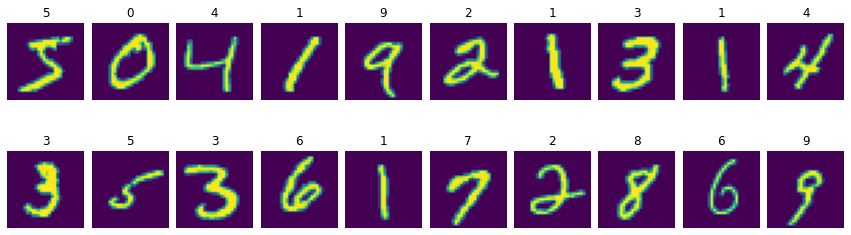

In [17]:
# menampilkan beberapa dataset dalam bentuk gambar
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10]])
        ax[j,i].axis('off')

plt.show()

In [18]:
# zero mean centering
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_test -= mean_image

In [20]:
# re shape untuk jadi 1 dimensi, karena di masukkan ke klassifer linear
X_train_reshape = X_train.reshape(60000, 28*28)
X_test_reshape = X_test.reshape(10000, 28*28)

y_train_reshape = y_train.ravel()
y_test_reshape = y_test.ravel()

print('X_train:', X_train_reshape.shape)
print('X_test:', X_test_reshape.shape)

print('y_train:', y_train_reshape.shape)
print('y_test:', y_test_reshape.shape)

X_train: (60000, 784)
X_test: (10000, 784)
y_train: (60000,)
y_test: (10000,)


In [21]:
# training menggunakan SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', max_iter=2000, verbose=2, n_jobs=2,learning_rate='invscaling', eta0=1e-7)
clf.fit(X_train_reshape, y_train_reshape)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


-- Epoch 1-- Epoch 1

Norm: 0.00, NNZs: 717, Bias: -0.000019, T: 60000, Avg. loss: 0.580357
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 717, Bias: -0.000019, T: 60000, Avg. loss: 0.573751
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 717, Bias: -0.000026, T: 120000, Avg. loss: 0.558201
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 717, Bias: -0.000027, T: 120000, Avg. loss: 0.550318
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 717, Bias: -0.000032, T: 180000, Avg. loss: 0.550841
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 717, Bias: -0.000033, T: 180000, Avg. loss: 0.542847
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 717, Bias: -0.000037, T: 240000, Avg. loss: 0.546211
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 717, Bias: -0.000037, T: 240000, Avg. loss: 0.538321
Total training time: 1.08 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 717, Bias: -0.000042, T: 3

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   18.8s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1e-07, fit_intercept=True,
              l1_ratio=0.15, learning_rate='invscaling', loss='log',
              max_iter=2000, n_iter_no_change=5, n_jobs=2, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [22]:
# perhitungan akurasi
y_pred = clf.predict(X_test_reshape)

from sklearn.metrics import accuracy_score
print('akurasi =',accuracy_score(y_test_reshape, y_pred)*100,'%')

akurasi = 83.31 %


In [23]:
# visualisasi bobot/weight, pelajari lagi clf.coef_
weights = clf.coef_
print(weights.shape)

(10, 784)


In [24]:
# pemilihan salah satu kelas untuk divisualisasi
class_id = 0

w0 = weights[class_id]
print(w0.shape)

(784,)


In [25]:
# normalisasi nilai bobot/weights ke dalam rentang 0-1 agar dapat di visualisasikan
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0.1,.9))
w0 = scaler.fit_transform(w0.reshape(-1, 1))

print(w0.shape)


(784, 1)


In [40]:
# dimensi 1D diubah menjadi 2D, dimensi gambar
w0 = w0.reshape(28,28)
w0_rgb = np.stack((w0,)*3, axis=-1)
print(w0.shape)

(28, 28)


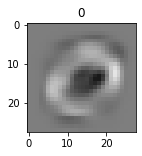

In [41]:
# visualisasi
plt.figure(figsize=(2,2))
plt.imshow(w0_rgb)
plt.title(classes[class_id])
plt.show()

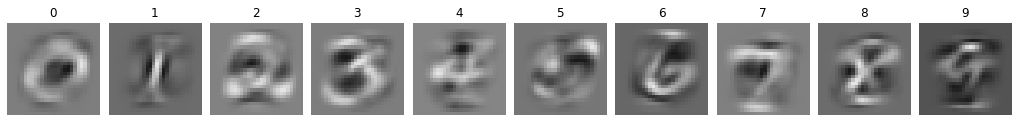

In [42]:
# visualisasi semua bobot/weights semua kelas
fig, ax = plt.subplots(1,10,figsize=(18,5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(0, 10):
    w = weights[i]
    
    w = scaler.fit_transform(w.reshape(-1, 1))
    
    w = w.reshape((28,28))
    
    ax[i].imshow(np.stack((w,)*3, axis=-1))
    ax[i].axis('off')
    ax[i].set_title(classes[i])
plt.show()